<a href="https://colab.research.google.com/github/JhonC147/UProjects/blob/main/Consultas_de_proximidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

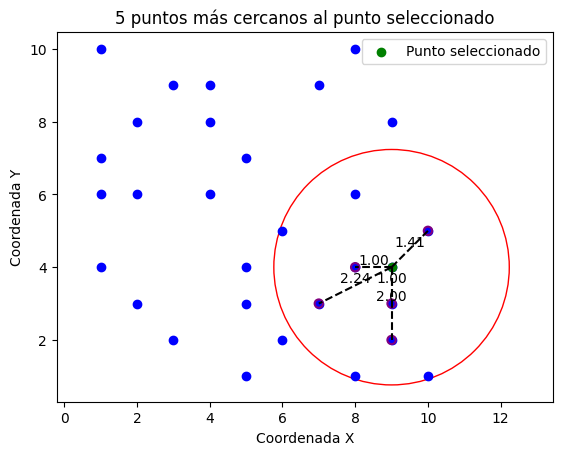

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Función para calcular distancia euclidiana entre dos puntos
def distancia(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Función principal
def main():
    # Definir los puntos (aumentados)
    puntos = [
        (2, 3), (5, 7), (8, 1), (4, 6), (1, 10), (9, 4),
        (3, 2), (6, 5), (9, 8), (5, 4), (10, 1), (7, 9),
        (1, 4), (4, 8), (7, 3), (2, 6), (8, 10), (3, 9),
        (5, 1), (8, 4), (1, 7), (6, 2), (10, 5), (9, 3),
        (2, 8), (5, 3), (8, 6), (4, 9), (1, 6), (9, 2)
    ]

    # Seleccionar un punto aleatorio como punto seleccionado
    indice_seleccionado = 5  # Puedes cambiar este índice según tus necesidades
    punto_seleccionado = puntos[indice_seleccionado]

    # Número de puntos cercanos que queremos encontrar
    num_puntos_cercanos = 5

    # Encontrar los puntos más cercanos al punto seleccionado (que no sean el punto seleccionado)
    puntos_restantes = [p for i, p in enumerate(puntos) if i != indice_seleccionado]
    puntos_cercanos = sorted(puntos_restantes, key=lambda x: distancia(punto_seleccionado, x))[:num_puntos_cercanos]

    # Calcular el radio del círculo que encierra todos los puntos cercanos
    radio_circulo = max(distancia(punto_seleccionado, punto) for punto in puntos_cercanos) + 1.0

    # Dibujar un círculo alrededor del punto seleccionado
    circulo = plt.Circle(punto_seleccionado, radius=radio_circulo, color='red', fill=False)
    plt.gca().add_patch(circulo)

    # Dibujar líneas que conecten el punto seleccionado con los puntos cercanos y mostrar la distancia
    for punto in puntos_cercanos:
        plt.plot([punto_seleccionado[0], punto[0]], [punto_seleccionado[1], punto[1]], color='black', linestyle='--')
        distancia_texto_x = (punto_seleccionado[0] + punto[0]) / 2
        distancia_texto_y = (punto_seleccionado[1] + punto[1]) / 2
        distancia_texto = f'{distancia(punto_seleccionado, punto):.2f}'
        plt.text(distancia_texto_x, distancia_texto_y, distancia_texto, horizontalalignment='center', verticalalignment='bottom')

    # Configurar el aspecto de la gráfica
    plt.scatter([p[0] for p in puntos], [p[1] for p in puntos], color='blue')
    plt.scatter(punto_seleccionado[0], punto_seleccionado[1], color='green', label='Punto seleccionado')
    for punto in puntos_cercanos:
        plt.scatter(punto[0], punto[1], color='none', edgecolor='purple', linewidth=1.5)
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title(f'{num_puntos_cercanos} puntos más cercanos al punto seleccionado')
    plt.legend()

    # Mostrar la gráfica
    plt.axis('equal')
    plt.show()

if __name__ == "__main__":
    main()
